# Home Assignment No. 1: Practice

To solve this task efficiently, here are some practical suggestions:

* You are **HIGHLY RECOMMENDED** to read relevant documentation, e.g. for [python](https://docs.python.org/3/), [numpy](https://docs.scipy.org/doc/numpy/reference/), [matlpotlib](https://matplotlib.org/) and [sklearn](https://scikit-learn.org/stable/). Also remember that tutorials, lecture slides, [Google](http://google.com) and [StackOverflow](https://stackoverflow.com/) are your close friends during this course (and, probably, the whole life?).


* Instead of rewriting existing code, if not explicitly asked to do so, use **BUILT-IN METHODS** available in the libraries. There exists a class/method for almost everything you can imagine (related to this homework).


* To complete this part of the homework, you have to write some **CODE** directly inside the specified places in the notebook **CELLS**.


* In some problems you are asked to provide a short discussion of the results. In these cases you have to create a **MARKDOWN** cell with your comments right after the corresponding code cell.


* For every separate problem, you can get **INTERMEDIATE scores**.


* Your **SOLUTION** notebook **MUST BE REPRODUCIBLE**, i.e. if a reviewer executes your code, the output will be the same (with all the corresponding plots) as in your uploaded files. For this purpose, we suggest to fix random `seed` or (better) define `random_state=` inside every algorithm that uses some pseudo randomness.


* Your code must be readable to any competent reviewer. For this purpose, try to include **necessary** (and not more) comments inside the code. But remember: **GOOD CODE MUST BE SELF-EXPLANATORY**.


* Many `sklearn` algorithms support multithreading (Ensemble Methods, Cross-Validation, etc.). Check if the particular algorithm has `n_jobs` parameter and set it to `-1` to use all the cores.


* **IMPORTANT:** In the end you need to hand in a **single zip file** containing **two notebooks** (theory and practice) as well as the **html exported versions** of these notebooks. That is **4** files in total.


To begin let's import the essential (for this assignment) libraries.

In [137]:
import logging

import numpy as np

# for reproducibility
np.random.seed(0)

import matplotlib.pyplot as plt
%matplotlib inline

# Set default parameters for plots
plt.rcParams['figure.figsize'] = (12.0, 6.0)
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# Least Mean Squares

In the **regression** problem objects (feature vectors) $\mathbf{x}_{1}, \dots, \mathbf{x}_{m} \in \mathbb{R}^d$ have real-valued labels $y_{1}, \dots, y_{m} \in \mathbb{R}$.

In Least Mean Squares the hypothesis function is given by a linear combination of the features $h_{\theta}(\mathbf{x}) = \mathbf{\theta}^\top \mathbf{x}$.

The maximum likelihood estimator for the Least Mean Squares problem is the solution of the following optimization problem.

$$
\theta^{*} = \arg \min_{\theta} \|\mathbf{X}\theta - \mathbf{y}\|^2,
$$

where $\mathbf{X}$ is a $m\times d$ matrix that has the feature vectors as rows and $\mathbf{y} \in \mathbb{R}^m$ is a vector consisting of all the labels.

This problem is known to have a unique closed-form solution in the case of a full-rank $\mathbf{X}$. 

$$
\theta^{*} = (\mathbf{X}^\top\mathbf{X})^{-1} \mathbf{X}^\top \mathbf{y}
$$

In the first part of this assignment you are asked to implement this solution.

## Task 1: Regressor Class [10 points]

In this task you are asked to implement a regressor class that fits the Least Squares parameters to the data and performs predictions at new data points. You need to implement 3 methods: fit, predict and score. `fit` estimates and stores the coefficients of the linear regression in *self.coef_*. `predict` performs prediction using the estimated coefficients. `score` calculates the mean squared error. 

In [138]:
class LeastSquares(object):
    def __init__(self):
        self.coef_ = None

    def fit(self, X: np.ndarray, y: np.ndarray):
        """
        :param X: array of shape (m, d)
        :param y: array of shape (m,)
        """
        ### BEGIN Solution

        #closed-form solution
        X_transpose = np.transpose(X)
        X_transpose_dot_X = np.dot(X_transpose, X)
        X_inverse = np.linalg.inv(X_transpose_dot_X)
        X_transpose_dot_y = np.dot(X_transpose, y)

        self.coef_ = np.dot(X_inverse, X_transpose_dot_y)  #theta

        return self.coef_
        ### END Solution

    def predict(self, X: np.ndarray) -> np.ndarray:
        """
        :param X: array of shape (m, d)
        :return: array of shape (m,)
        """
        assert self.coef_ is not None, "Fit the model first!"

        ### BEGIN Solution

        predictions = X.dot(self.coef_)

        ### END Solution

        assert predictions.shape == (X.shape[0],), "Check shapes!"

        return predictions

    def score(self, X: np.ndarray, y: np.ndarray) -> np.float64:
        """
        Calculates mean squared error.
        
        :param x: array of shape (m, d)
        :param y: array of shape (m,)
        :return: single number
        """
        ### BEGIN Solution

        predictions = self.predict(X)
        lse = np.mean((predictions - y) ** 2)
        return lse

        ### END Solution

## Task 2. Regression Line [10 points]

In this task, your goal is to visualize the **regression line** of **Least Mean Squares** applied to a synthetic dataset. In the cell below we generate the dataset.

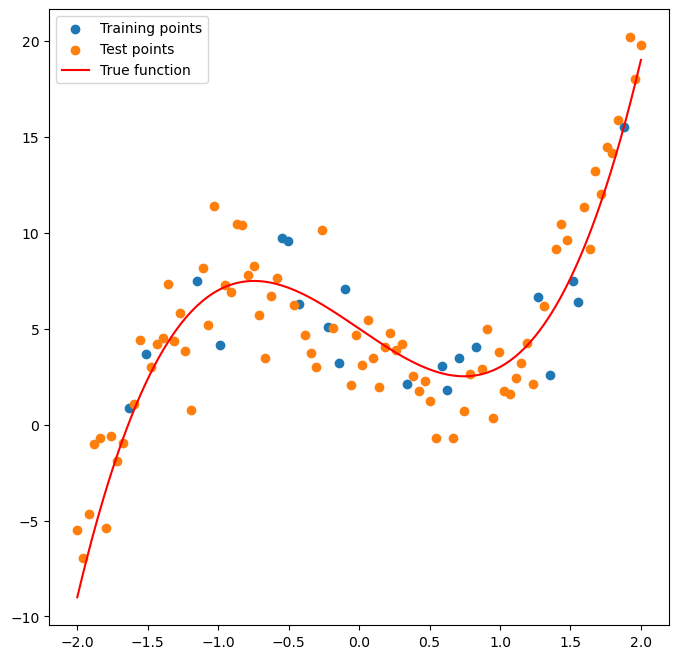

In [139]:
from sklearn.model_selection import train_test_split

np.random.seed(0)


def f(X, noise_rate: float = 0):
    return 3 * X ** 3 - 5 * X + 5 + noise_rate * np.random.randn(X.shape[0])


n_samples = 100
X = np.linspace(-2, 2, n_samples)
y = f(X, noise_rate=2)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8, shuffle=True, random_state=0)

fig = plt.figure(figsize=(8, 8))

plt.scatter(X_train, y_train, label="Training points")
plt.scatter(X_test, y_test, label="Test points")

xrange = np.linspace(-2, 2, 1000)
plt.plot(xrange, f(xrange, noise_rate=0), c="r", label="True function")
plt.plot()

plt.legend()
plt.show()

In [140]:
print(X.shape)
print(y.shape)

(100,)
(100,)


Fit your model to the training data and visualize the predictions on the same plot with the data points. Report the mean squared error on the training and test data.

Least Squared Error on Training Set 38.40402189955796
Least Squared Error on Test Set 46.308954419947966


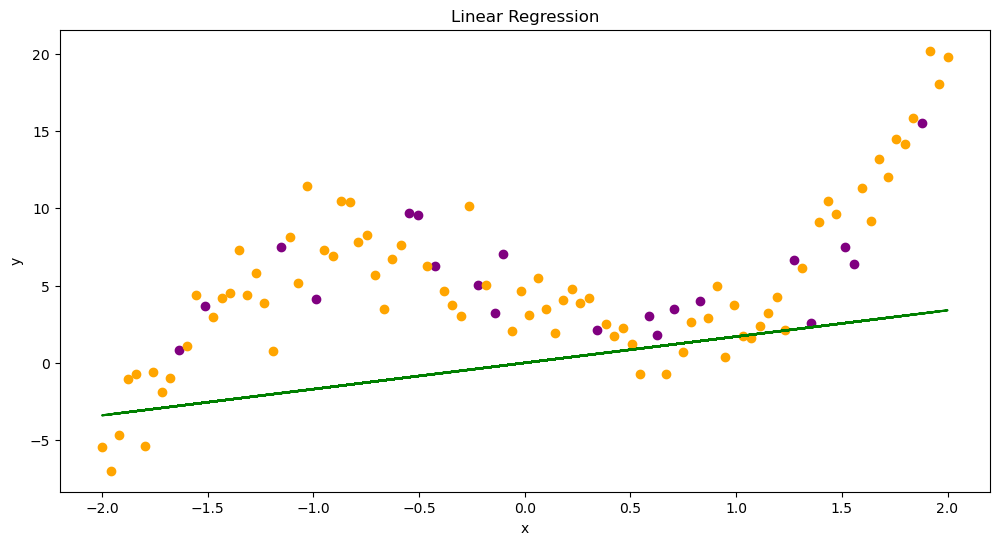

In [141]:
### BEGIN Solution
leastSquares = LeastSquares()
X_train = X_train.reshape(-1, 1)
X_test = X_test.reshape(-1, 1)

leastSquares.fit(X_train, y_train)

predictions_train_set = leastSquares.predict(X_train)
predictions_test_set = leastSquares.predict(X_test)

#lse = least squared error
lse_train = leastSquares.score(X_train, y_train)
lse_test = leastSquares.score(X_test, y_test)

print("Least Squared Error on Training Set", lse_train)
print("Least Squared Error on Test Set", lse_test)

plt.scatter(X_train, y_train, color="purple", label="Training Data")
plt.scatter(X_test, y_test, color="orange", label="Test Data")
plt.plot(X_test, predictions_test_set, color="green", label="Prediction")
# plt.plot(X_train, predictions_train_set, color="red", label="Prediction")
plt.title("Linear Regression")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

### END Solution

You may notice that the prediction is far from being accurate. In this example the features are 1-dimensional. So the hypothesis function has the form $\theta x$, where both $\theta$ and $x$ are real numbers. Hence, the regression line has to go through the point (0, 0), which leads to inaccuracies, when $y$ is biased, as in the example above. To overcome this, a common practice is to add an additional column of 1s to the data matrix $\mathbf{X}$. This will model the intercept of the regression line.

Implement this and visualize/report the results.

Least Squared Error on Training Set 10.505999757669578
Least Squared Error on Test Set 23.222364478406426


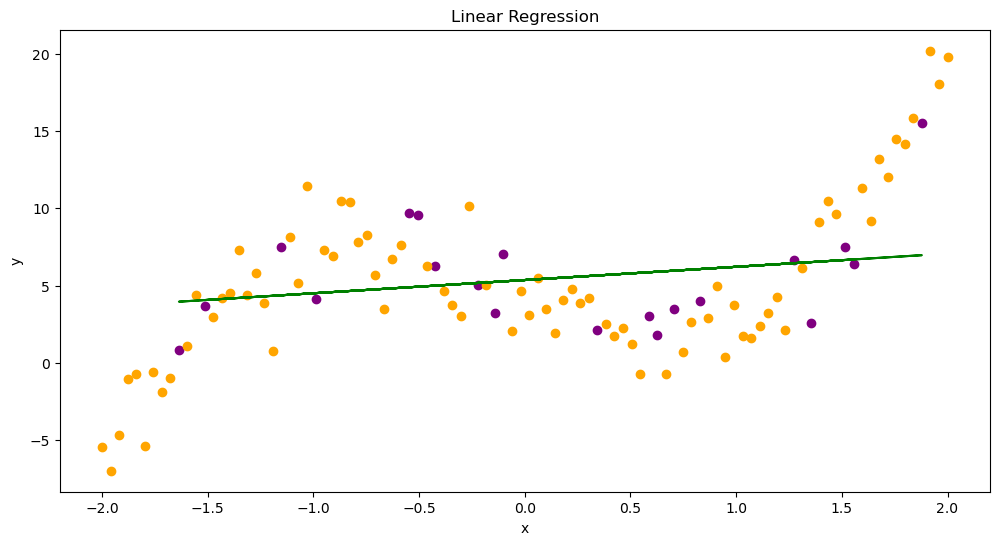

In [142]:
### BEGIN Solution
leastSquares = LeastSquares()

# logging.info("X_train shape before intercept:", X_train.shape)
# logging.info("y_train shape before intercept:", y_train.shape)

X_train_with_intercept = np.c_[np.ones((X_train.shape[0], 1)), X_train]
X_test_with_intercept = np.c_[np.ones((X_test.shape[0], 1)), X_test]

# logging.info("X_train shape after intercept:", X_train.shape)
# logging.info("y_train shape after intercept:", y_train.shape)

leastSquares.fit(X_train_with_intercept, y_train)

predictions_train = leastSquares.predict(X_train_with_intercept)
predictions_test = leastSquares.predict(X_test_with_intercept)

#lse = least squared error
lse_train = leastSquares.score(X_train_with_intercept, y_train)
lse_test = leastSquares.score(X_test_with_intercept, y_test)

print("Least Squared Error on Training Set", lse_train)
print("Least Squared Error on Test Set", lse_test)

plt.scatter(X_train, y_train, color='purple', label='Training Data')
plt.scatter(X_test, y_test, color='orange', label='Test Data')
plt.plot(X_train, predictions_train, color="green", label="Prediction")
plt.title("Linear Regression")
plt.xlabel("x")
plt.ylabel("y")
plt.show()
### END Solution

# Locally Weighted Linear Regression

As you may observe in the previous task, linear models have difficulties with fitting non-linear functions. One way to overcome this could be to consider non-linear modifications of the original features in the model. We will leave this for later. Another way is to do Locally Weighted Regression (LWR). 

In LWR a separate regression is fitted and used to predict the outcome at each query points. The training examples are weighted according to their similarity to the query point (in the simplest form, the distance to the query point is used). That is, for a data point $\mathbf{x}_0 \in \mathbb{R}^d$ the prediction is given by:

$$
\hat y_0 = \theta^*(\mathbf{x}_0)^\top \mathbf{x}_0
$$

where

$$
\theta^*(\mathbf{x}_0) = \arg \min_{\theta(\mathbf{x}_0)} \sum_{i = 1}^m w^{(i)}(\mathbf{x}_0) \left(y_i - \theta(\mathbf{x}_0)^\top \mathbf{x}_i\right)^2
$$

Let $W(\mathbf{x}_0)$ be a $m\times m$ diagonal matrix with $w^{(i)}(\mathbf{x}_0)$ on the $i$-th diagonal element. Then under the same assumptions as for LMS a closed form solution can be derived for $\hat y_0$.

$$
\hat y_0 = \mathbf{x}_0^\top (\mathbf{X}^\top W(\mathbf{x}_0) \mathbf{X})^{-1} X^\top W(\mathbf{x}_0) \mathbf{y}
$$

## Task 3. Implement LWR [15 points]

In this task you need to implement a class that preforms Locally Weighted Linear Regression. As the model is fitted again for every new query point, the `fit` method only needs to memorise the dataset. You are asked to implement 3 methods: kernel, predict_ and score. `kernel` constructs the $W(\mathbf{x}_0)$ matrix. Let's consider a specific kernel here, that is given by:

$$
w^{(i)}(\mathbf{x}_0) = \exp\left(- \frac{\|\mathbf{x}_0 - \mathbf{x}_i\|^2}{2 \tau^2}\right)
$$

`predict_` performs prediction for a single data sample. `score`, as before, calculates the mean squared error.

In [143]:
class LocalLeastSquares(object):
    def __init__(self, tau: float):
        self.tau_ = tau

        self.X_ = None
        self.y_ = None

        self.coef_ = None

    def kernel(self, x: np.ndarray) -> np.ndarray:
        """
        :param x: array of shape (d,)
        :return: array of shape (m, m)
        """
        # Weight matrix construction
        norm = np.linalg.norm(self.X_ - x, axis=1)
        weights = np.exp(-norm ** 2 / (2 * self.tau_ ** 2))
        
        return np.diag(weights)

        ### END Solution

    def fit(self, X: np.ndarray, y: np.ndarray):
        """
        :param X: array of shape (m, d)
        :param y: array of shape (m,)
        """
        self.X_ = X
        self.y_ = y.reshape(-1, 1)
        
        # self.X_ = X
        # self.y_ = y.reshape(-1, 1)
        # W = self.kernel(X)
        # X_transpose = np.transpose(self.X_)
        # self.coef_ = np.linalg.inv(X_transpose.dot(W).dot(self.X_)).dot(X_transpose).dot(W).dot(self.y_)

    def predict_(self, x: np.ndarray) -> np.float64:
        """
        :param x: array of shape (d,)
        :return: single number, prediction at x
        """
        ### BEGIN Solution
        #predicting the target value for a single point

        W = self.kernel(x)
        X_transpose = np.transpose(self.X_)

        theta = np.linalg.inv(X_transpose.dot(W).dot(self.X_)).dot(X_transpose).dot(W).dot(self.y_)
        prediction = np.dot(x, theta.flatten())
        
        # W = self.kernel(x)
        # prediction = np.dot(x, self.coef_.flatten())
        return prediction
        
        ### END Solution

    def predict(self, X: np.ndarray) -> np.ndarray:
        """
        :param X: array of shape (m, d)
        :return: array of shape (m,)
        """
        return np.array([self.predict_(x) for x in X])

    def score(self, X, y):
        """
        Calculates mean squared error.
        
        :param X: array of shape (m, d)
        :param y: array of shape (m,)
        :return: single number
        """
        ### BEGIN Solution
        predictions = self.predict(X)
        weighted_squared_errors = []

        for i in range(len(predictions)):
            squared_error = (predictions[i] - y[i]) ** 2
            weight_matrix = self.kernel(X[i])
            weighted_squared_error = squared_error * weight_matrix
            weighted_squared_errors.append(weighted_squared_error)

        # Calculate least squared error
        lse = np.mean(weighted_squared_errors)
        return lse

        ### END Solution

Visualize the resulting regression line along with the data points and train/test MSE, as done in the previous examples.

Least Squared Error on Training Set 0.008382742677896784
Least Squared Error on Test Set 0.025137734085748556


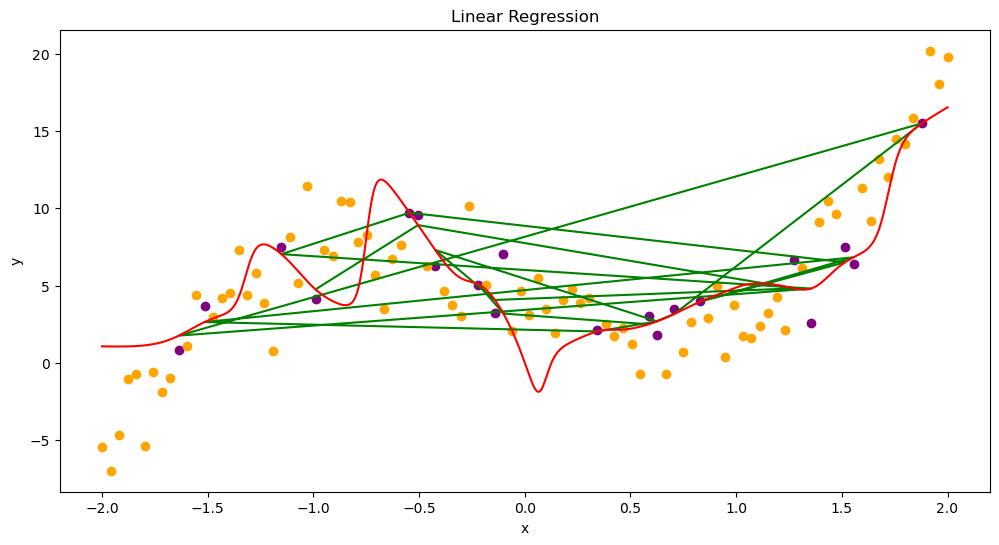

In [144]:
### BEGIN Solution
leastSquaresInstance = LocalLeastSquares(tau=0.1)

leastSquaresInstance.fit(X_train, y_train)

predictions_train = leastSquaresInstance.predict(X_train)
predictions_test = leastSquaresInstance.predict(X_test)
x_range_prediction = leastSquaresInstance.predict(xrange.reshape(-1, 1))

lse_train = leastSquaresInstance.score(X_train, y_train)
lse_test = leastSquaresInstance.score(X_test, y_test)

print("Least Squared Error on Training Set", lse_train)
print("Least Squared Error on Test Set", lse_test)

plt.scatter(X_train, y_train, color='purple', label='Training Data')
plt.scatter(X_test, y_test, color='orange', label='Test Data')
plt.plot(X_train, predictions_train, color="green", label="Prediction")
plt.plot(xrange, x_range_prediction, color="red", label="Prediction X range")
plt.title("Linear Regression")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

### END Solution

## Task 4. Tune the hyperparameters [7 points]

$\tau$ is an important hyperparameter that can regulate overfitting of the method. Choose an optimal value of $\tau$ in order to minimize the residual sum of squares on the left out data.

In [145]:
### BEGIN Solution
optimal_tau = None
best_lse = None
tau_values = [0.1, 0.5, 1.0, 2.0, 5.0]

for tau in tau_values:
    leastSquaresInstance = LocalLeastSquares(tau=tau)
    leastSquaresInstance.fit(X_train, y_train)

    lse_test = leastSquaresInstance.score(X_test, y_test)

    if best_lse is None or lse_test < best_lse:
        best_lse = lse_test
        optimal_tau = tau

print("Optimal tau", optimal_tau)
### END Solution

Optimal tau 0.1


What is the effect of different values for $\tau$?

$\tau$ represents the bandwidth of the neighborhood that we're looking into to fit the local straight line. Depending on $\tau$, we get the bell-shaped curve that can be thinner or fatter. If $\tau$ is too broad, it means that the bell-shaped curve will be broader, which might over-smooth the data and miss important patterns, so it would lead to underfitting. If $\tau$ is too narrow, then it leads to overfitting, because the model focuses excessively in details of the data, including noise, while missing the underlying pattern.

What are advantages/disadvantages of the LWR method?

Advantages of LWR:
- Solves the problem of fitting inherently non-linear data. 
- Has good performance when the number of features n is less, 2-3 dimensional data.
- No training phase, since it is a non-parametric algorithm.

Disadvantages of LWR:
- High computational costs, since it holds all the data and performs calculations for every prediction.
- Challenge of choosing the optimal hyper parameter $\tau$ , without leading to overfitting or underfitting.
- If the data is too sparse, the model might extrapolate and give inaccurate results. 
- Non-intuitive interpretability, since the line can have different shapes or look like a black-box, then it is hard to interpret the patterns in the data.

# Logistic Regression

Now let's consider **classification** task. In the **binary classification** problem objects (feature vectors) $\mathbf{x}_{1}, \dots, \mathbf{x}_{m} \in \mathbb{R}^d$ have binary labels $y_{1}, \dots, y_{m} \in \{0, 1\}$.

Using a **linear combination** of the features $\mathbf{\theta}^\top \mathbf{x}$, like in Least Mean Squares, will result in an unbounded estimator. However, we would like to have a mapping $f_{\mathbf{\theta}}: \mathbb{R}^d \to \{0, 1\}$, the output of which can be naturally interpreted as the probability of belonging to class 1.

In **Logistic Regression** the resulting dot-product $\mathbf{\theta}^\top \mathbf{x}$ is converted to the unit interval with the **sigmoid** function:

$$g(z) = \frac{1}{1 + e^{-z}}$$

This gives us the hypothesis function:

$$f_{\mathbf{\theta}}(\mathbf{x}) = g(\mathbf{\theta}^{\top}\mathbf{x}) = \frac{1}{1 + e^{-\mathbf{\theta}^{\top}\mathbf{x}}}$$

Now, we only need to set a **threshold** (for example, 0.5) for classifying an object to the 1st class.

## Task 5. Sigmoid [4 points]

Implement and plot the sigmoid function. 

**Important!** Your function should work for inputs of arbitrary shape. The sigmoid should be applied elementwise. The returned array should have the same shape as the input. 

**Important!!** For large negative input, computing the exponent in the sigmoid may result in overflow. Use an alternative form of the sigmoid for the negative entries of the input to deal with this issue.

**Hint:** An alternative form can be obtained by multiplying the nominator and the denominator of the sigmoid by $e^z$.

In [146]:
def sigmoid(z: np.ndarray) -> np.ndarray:
    """
    :param z: array of arbitrary shape
    """
    ### BEGIN Solution
    positive_mask = z >= 0
    exp_z = np.exp(-np.abs(z))
    sigmoid_function_values = np.zeros_like(z, dtype=float)
    sigmoid_function_values[positive_mask] = 1 / (1 + np.exp(-z[positive_mask]))
    sigmoid_function_values[~positive_mask] = exp_z[~positive_mask] / (exp_z[~positive_mask] + 1)

    return sigmoid_function_values
    ### END Solution

In [147]:
# This should not raise a warning
sigmoid(np.array([-1000]))

array([0.])

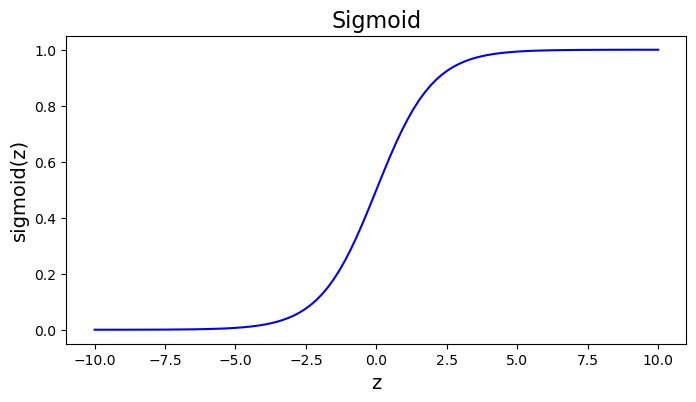

In [148]:
z = np.linspace(-10, 10, 100)

plt.figure(figsize=(8, 4))

### BEGIN Solution
sigmoid_function_values = sigmoid(z)
plt.plot(z, sigmoid_function_values, label='Sigmoid Function', color='blue')
### END Solution

plt.title('Sigmoid', size=16)

plt.xlabel('z', size=14)
plt.ylabel('sigmoid(z)', size=14)

plt.show()

Thus, the conditional probabilities of belonging to class 1 or 0 are as follows:

$$\begin{align}
    p(y = 1| \mathbf{x}; \mathbf{\theta}) &= f_{\mathbf{\theta}}(\mathbf{x}) \\
    p(y = 0| \mathbf{x}; \mathbf{\theta}) &= 1 - f_{\mathbf{\theta}}(\mathbf{x})
\end{align}$$

Or one could rewrite it as:

$$p(y| \mathbf{x}; \mathbf{\theta}) = f_{\mathbf{\theta}}(\mathbf{x})^{y}\bigl[1 - f_{\mathbf{\theta}}(\mathbf{x})\bigr]^{1 - y}$$

&nbsp;

Now, to **estimate** the weights $\mathbf{\theta}$, we will **maximize** the **likelihood** function (more precisely, its logarithm for simpler calculations). Therefore, this method is called the **maximum likelihood estimation** (MLE).

$$\ln{\mathcal{L}(\mathbf{\theta})} = \mathcal{l}(\mathbf{\theta}) = \sum\limits_{i = 1}^m p(y_i| \mathbf{x}_i; \mathbf{\theta}) = \sum\limits_{i = 1}^m y_i \ln{\bigl[f_{\mathbf{\theta}}(\mathbf{x}_i) \bigr]} + (1 - y_i)\ln{\bigl[1 - f_{\mathbf{\theta}}(\mathbf{x}_i) \bigr]} \to \max\limits_{\mathbf{\theta}}$$

## Task 6. Log-Likelihood [3 points]

Let $\mathbf{X} = \begin{bmatrix} \mathbf{x}_1^{\top} \\ \vdots \\ \mathbf{x}_m^{\top} \end{bmatrix} \in \mathbb{R}^{m \times d}$ be the data matrix, $\mathbf{y} = \begin{bmatrix} y_1 \\ \vdots \\ y_m \end{bmatrix} \in \mathbb{R}^{m}$ be the labels vector corresponding to $\mathbf{X}$ and $\mathbf{\theta} = \begin{bmatrix} \theta_1 \\ \vdots \\ \theta_d \end{bmatrix} \in \mathbb{R}^{d}$ be the parameters vector.

Implement the log-likelihood for Logistic Regression.

**Note:** You have already implemented the sigmoid function. Now it is time to use it.

In [149]:
def log_likelihood_log_reg(theta, X, y):
    ### BEGIN Solution
    sigmoid_outputs = sigmoid(np.dot(X, theta))

    log_likelihood = np.sum(y * np.log(sigmoid_outputs) + (1 - y) * np.log(1 - sigmoid_outputs))

    return log_likelihood
    ### END Solution

In [150]:
m = 100
d = 2

#integers between -10 and 9
X = np.random.randint(low=-10, high=10, size=(m, d))
#binary array with random 0s and 1s
y = np.random.randint(low=0, high=1, size=(m, 1))
#initial value is 0 so algorithm can start the optimization somewhere, it gets updated while updating the parameters
theta = np.zeros((d, 1))

assert np.allclose(log_likelihood_log_reg(theta, X, y),
                   -m * np.log(2),
                   atol=1e-8), "Houston, we have a problem!"
print("Well done!")

Well done!


## Task 7. Gradient Descent [8 points]

Now, to find the weights $\mathbf{\theta}$, we need to solve the optimization problem described above. Let's use [**gradient descent**](https://en.wikipedia.org/wiki/Gradient_descent).

Since the gradient descent solves the **minimization** problem, we will change the maximization problem described above to the minimization problem by changing the sign of the log-likelihood function to negative:

$$\mathcal{l}(\mathbf{\theta}) \to \max\limits_{\mathbf{\theta}} \Longleftrightarrow -\mathcal{l}(\mathbf{\theta}) \to \min\limits_{\mathbf{\theta}}$$

So, let's first implement a function to compute the gradient of the **negative** log-likelihood function.

The gradient is a column vector that has **the same shape as** $\mathbf{\theta}$.

In [151]:
def negative_gradient_log_reg(theta, X, y):
    ### BEGIN Solution
    sigmoid_outputs = sigmoid(np.dot(X, theta))

    #negative likelihood loss function
    gradient = -np.dot(X.T, (sigmoid_outputs - y)) / m

    return gradient
    ### END Solution

Now implement the general gradient descent algorithm.

In [152]:
 def gradient_descent(X, y, gradient, theta_0, alpha=0.01, tolerance=1e-8, max_iters_number=100):
    """
    X: data matrix of shape [m, d]
    y: labels of shape [m]
    gradient: a function to compute the gradient of the neg. log-likelihood
    theta_0: initialization of theta of shape [d]
    alpha: learning rate
    tolerance: a value to detect convergence (if the norm of the update is smaller that tolerance, terminate)
    max_iters_number: maximum number of iterations of the algorithm
    
    return: the final estimation for theta
    """
    if y.ndim == 1:
        y = y[:, np.newaxis]

    if theta_0.ndim == 1:
        theta_0 = theta_0[:, np.newaxis]

    ### BEGIN Solution
    theta = theta_0
    previous_loss = np.inf

    # max_iters = maximum number of iterations
    for iteration in range(max_iters_number):
        # Compute gradient and update parameters
        grad = gradient(theta, X, y)
        theta -= alpha * grad

        # Compute loss aka negative log-likelihood and check for convergence
        current_loss = -np.sum(np.log(sigmoid(np.dot(X, theta))) * y + np.log(1 - sigmoid(np.dot(X, theta))) * (1 - y))

        # Check for convergence based on the change in loss
        if abs(previous_loss - current_loss) < tolerance:
            break

        previous_loss = current_loss

    return theta.flatten()
    ### END Solution

## Task 8. Classifier [10 points]

Let's create our own classifier class and then compare it with the [existing method in the sklearn library](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html).

We need to implement three principal methods:

* `fit` to find the coefficients (weights) $\mathbf{\theta}$


* `predict` to predict the labels $\mathbf{\hat{y}}$ for the data matrix $\mathbf{X}$


* `score` to evaluate predictions (for example, with **mean accuracy** score)

In [153]:
def accuracy_score(predictions, labels):
    """
    Returns the accuracy of predictions when compared to the true labels
    """
    assert predictions.shape == labels.shape, "Check shapes!"
    ### BEGIN Solution
    correct_predictions = 0
    for prediction, label in zip(predictions, labels):
        if prediction == label:
            correct_predictions += 1

    accuracy = correct_predictions / len(predictions)

    return accuracy
    ### END Solution

In [154]:
class LogReg(object):
    def __init__(self):
        self.coef_ = None

    def fit(self, X, y):
        ### BEGIN Solution
        self.coef_ = np.zeros(X.shape[1])
        # alpha = learning rate for gradient descent
        alpha = 0.01
        # number of iterations for gradient descent
        iterations = 1000

        for iteration in range(iterations):
            # compute predictions
            predictions = sigmoid(np.dot(X, self.coef_))
            # compute error
            error = y - predictions
            # update coefficients using gradient descent
            self.coef_ += alpha * np.dot(X.T, error)
        ### END Solution

    def predict(self, X, threshold=0.5):
        ### BEGIN Solution
        probabilities = sigmoid(np.dot(X, self.coef_))
        predictions = (probabilities >= threshold).astype(int)
        ### END Solution

        assert predictions.shape == (X.shape[0],), "Check shapes!"

        return predictions

    def score(self, X, y):
        ### BEGIN Solution
        predictions = self.predict(X)
        return accuracy_score(predictions, y)
        ### END Solution

## Task 9. Decision Rule [6 points]

In this task, your goal is to visualize the **decision rule** of **Logistic Regression** applied to a synthetic $2$-dimensional dataset generated by a built-in `sklearn.datasets` method called `make_moons`. In the cell below we generate the dataset.

In [155]:
from sklearn.datasets import make_moons

In [156]:
X, y = make_moons(n_samples=300, noise=0.2, random_state=0)
print(X.shape, y.shape)

(300, 2) (300,)


The goal is to fit our LogReg and sklearn's Logistic Regression classifiers to this data:

You have to plot the decision regions. The plots must have **titles**, which contain the names of the classifiers and the corresponding accuracy (rounded to only **two** decimal places).

You can write the plotting code on your own, but we highly recommend just to use [mlxtend](http://rasbt.github.io/mlxtend/user_guide/plotting/plot_decision_regions/) library (`pip install mlxtend`), which has a awesome one-line decision boundary plotting function.

In [157]:
from sklearn.linear_model import LogisticRegression
from mlxtend.plotting import plot_decision_regions
import matplotlib.pyplot as plt

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Plotting decision regions for LogReg

In [158]:
my_logistic_regression = LogReg()
logistic_regression = LogisticRegression(random_state=0, solver='lbfgs', n_jobs=-1)

classifiers = [my_logistic_regression, logistic_regression]

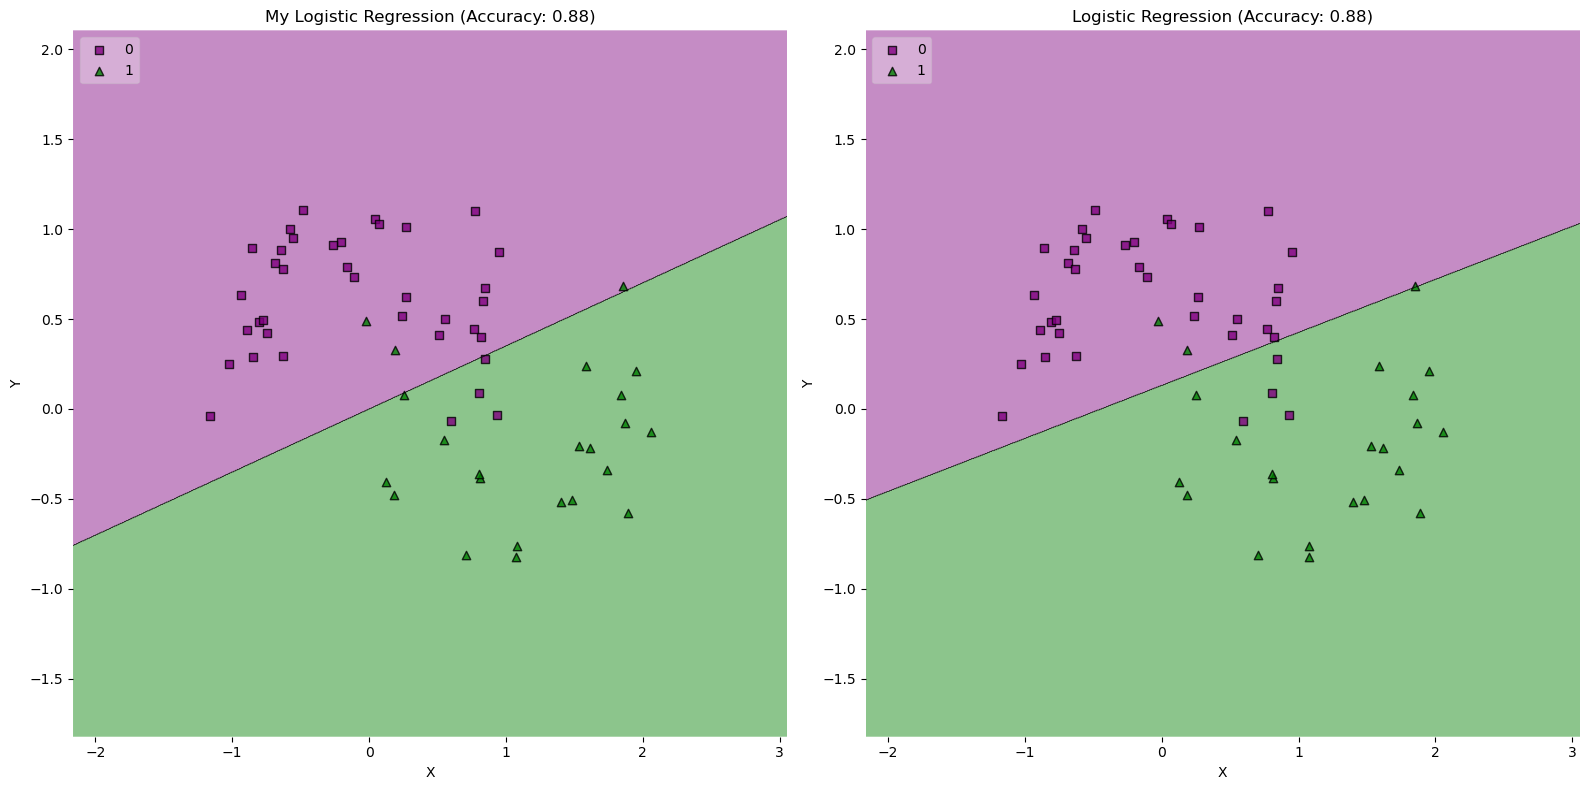

In [159]:
# plotting
fig, axes = plt.subplots(ncols=2, nrows=1, figsize=(16, 8))

for classifier, axis in zip(classifiers, axes.flat):
    y_train = y_train.astype(np.int_)
    y_test = y_test.astype(np.int_)

    classifier.fit(X_train, y_train)

    y_prediction = classifier.predict(X_test)
    accuracy = accuracy_score(y_test, y_prediction)

    plot_decision_regions(X_test, y_test.astype(np.int_), clf=classifier, legend=2, ax=axis, colors="purple,green")

    classifier_name = None
    if classifier == my_logistic_regression:
        classifier_name = "My Logistic Regression"
    else:
        classifier_name = "Logistic Regression"

    axis.set_xlabel('X')
    axis.set_ylabel('Y')
    axis.set_title(f'{classifier_name} (Accuracy: {accuracy:.2f})')

plt.tight_layout()
plt.show()
### END Solution

## Task 10. Feature Engineering [7 points]

In the previous task, classifiers obviously failed fitting to data. This happened because the decision boundary of the classifier has a restricted linear form, while the data is much more complicated.

One may try to change the parameters of the classifier in order to improve accuracy, but linear models do not have parameters that can change the form of the decision rule.

In this case, the **feature engineering** helps: one may try to compute new (e.g. non-linear) features based on the existing ones and fit the classifier for the new features. This may help low-complexity classifiers to fit complex data dependencies.

Your task is

* to achieve accuracy $> 0.95$, by generating additional features (e.g. polynomial),


* to plot decision rules in the original feature space,


* to write 2-3 sentences about why you chose these features.

It is your choice how to generate features. You may create hand-crafted features and add them manually.

Nevertheless, we **highly recommend** getting used to and applying the following built-in `sklearn` methods, for example:

* `PolynomialFeatures` for [feature generation](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html)

* `StandardScaler`for [feature scaling](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html)

* `Pipeline` - for [combining several operations](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html) in a row (e.g. feature creation & prediction)

In [160]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split

from sklearn.datasets import make_moons

X, y = make_moons(n_samples=300, noise=0.2, random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [161]:
logistic_regression_simple = Pipeline([('LR', LogisticRegression(random_state=0, solver='lbfgs', n_jobs=-1))])

### BEGIN Solution
logistic_regression_advanced = Pipeline([
    ('poly_features', PolynomialFeatures(degree=5)),  #used degree 5 to reach accuracy >= 0.95
    ('scaler', StandardScaler()),
    ('LR', LogisticRegression(random_state=0, solver='lbfgs', n_jobs=-1))
])
### END Solution

classifiers = [logistic_regression_simple, logistic_regression_advanced]

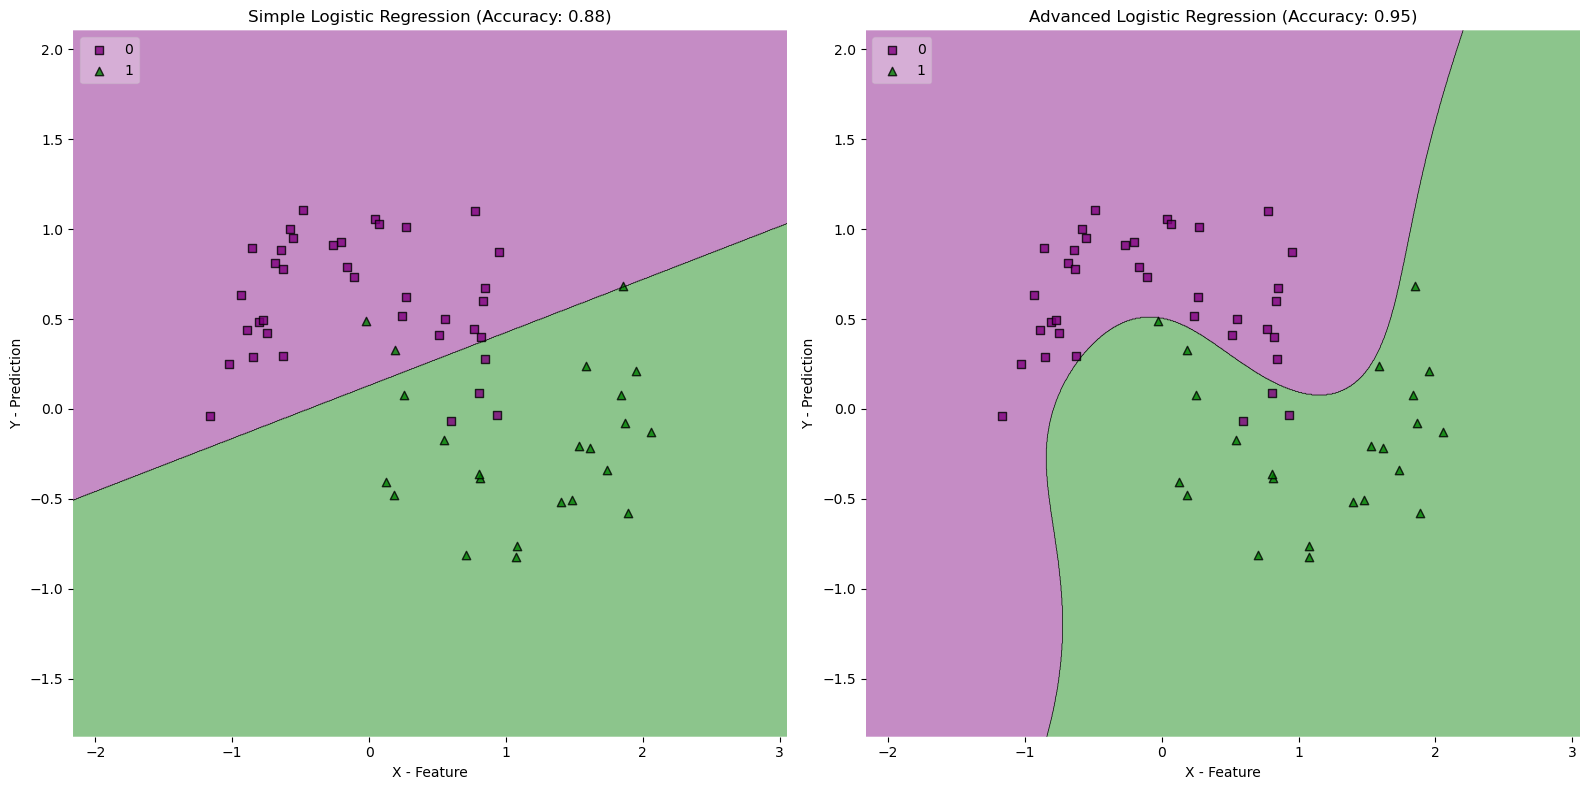

In [162]:
# plotting

fig, axes = plt.subplots(ncols=2, nrows=1, figsize=(16, 8))

for classifier, axis in zip(classifiers, axes.flat):
    ### BEGIN Solution
    classifier.fit(X_train, y_train)

    accuracy = classifier.score(X_test, y_test)
    plot_decision_regions(X_test, y_test.astype(np.int_), clf=classifier, legend=2, ax=axis, colors="purple,green")

    classifier_name = None

    if classifier == logistic_regression_simple:
        classifier_name = "Simple Logistic Regression"
    else:
        classifier_name = "Advanced Logistic Regression"

    axis.set_xlabel('X - Feature')
    axis.set_ylabel('Y - Prediction')
    axis.set_title(f'{classifier_name} (Accuracy: {accuracy:.2f})')

plt.tight_layout()
plt.show()
### END Solution

Why did you choose these features?

Polynomial Feature

-Logistic regression can handle non-linear relationships between the input and output variables. The logistic function can model non-linear relationships by using polynomials of different degrees, and then calculate the probability of events happening. In our case, the relationship was non-linear, so polynomial of 5th degree had to be used in order to achieve an accuracy_score >= 0.95. Using a fifth degree polynomial can lead to issues such as overfitting or computational complexity. So, if we trade off the accuracy_score with less computational complexity, we could have used a polynomial of 3rd or 4th degree (0.93 accuracy).

Standard Scaler

-Standard Scaler has been used to improve convergence. Standard scaling ensures that all properties have a Standard Normal Distribution N~(0, 1), so they are all on a similar scale and there are no properties dominating the learning process.

# Face classification



In this task you will face a real-life problem of face detection. You have to train a model to classify 24$\times$24 grayscale images to *face*/*non-face* classes.
First, let us import some libraries and load the data.

In [163]:
from scipy.io import loadmat
from sklearn.model_selection import train_test_split

# Set default parameters for plots
plt.rcParams['figure.figsize'] = (12.0, 6.0)
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

In [164]:
# Load the dataset
data = loadmat('faces.mat')
labels = np.squeeze(data['Labels'])
labels[labels == -1] = 0  # Want labels in {0, 1}
data = data['Data']
data.shape

(19832, 576)

Each datapoint is a 576-dimentional vector that stores pixel intensities of a flattened grayscale image.
If carefully reshaped, one can visualize the datapoints as 24$\times$24 images.

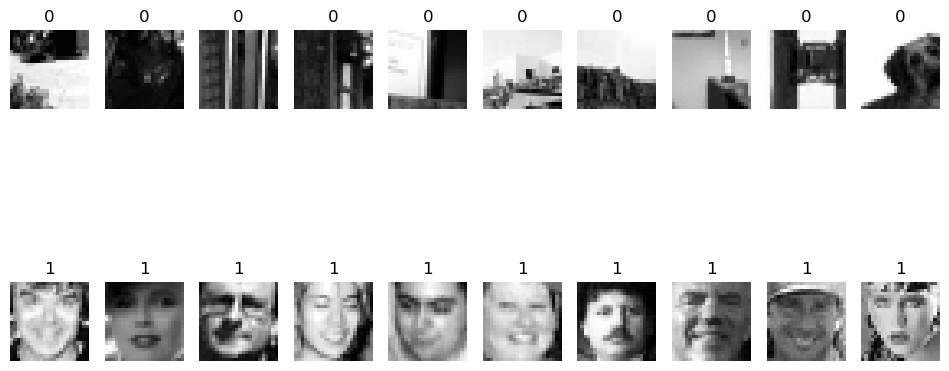

In [165]:
# Visualize some examples from the dataset.
samples_per_class = 10
classes = [0, 1]
imgs = np.reshape(data, [-1, 24, 24], order='F')

for y, cls in enumerate(classes):
    idxs = np.flatnonzero(np.equal(labels, cls))
    idxs = np.random.choice(idxs, samples_per_class, replace=False)
    for i, idx in enumerate(idxs):
        plt_idx = y * samples_per_class + i + 1
        plt.subplot(len(classes), samples_per_class, plt_idx)
        plt.imshow(imgs[idx])
        plt.axis('off')
        plt.title(cls)
plt.show()

Now let us split the dataset into train and test. This will allow to assess the ability of our models to generalize to unseen data.

In [166]:
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.3)
num_train = X_train.shape[0]
num_test = X_test.shape[0]

# As a sanity check, we print out the size of the training and test data.
print('Training data shape: ', X_train.shape)
print('Training labels shape: ', y_train.shape)
print('Test data shape: ', X_test.shape)
print('Test labels shape: ', y_test.shape)

Training data shape:  (13882, 576)
Training labels shape:  (13882,)
Test data shape:  (5950, 576)
Test labels shape:  (5950,)


## Task 11. Logistic Regression for Face Classification [5 points]

Now fit your *LogReg* class on *(X_train, y_train)* and report the accuracy on both the **train** and **test** sets.

**Warning:** It may take time to fit your model to this amount of data.

In [167]:
### BEGIN Solution
my_logistic_regression = LogReg()

my_logistic_regression.fit(X_train, y_train)

train_predictions = my_logistic_regression.predict(X_train)
test_predictions = my_logistic_regression.predict(X_test)

train_accuracy = accuracy_score(train_predictions, y_train)
test_accuracy = accuracy_score(test_predictions, y_test)

print(f'Training Accuracy: {train_accuracy:.2f}')
print(f'Test Accuracy: {test_accuracy:.2f}')
### END Solution

Training Accuracy: 0.92
Test Accuracy: 0.91


Visualize the learned coefficients as a grayscale image. Reshape the coefficients and use *plt.imshow()*.

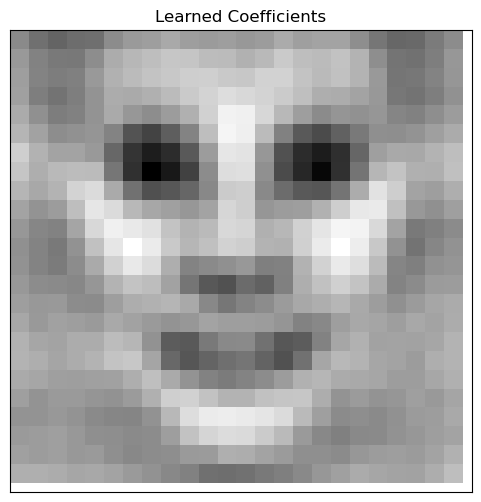

In [168]:
### BEGIN Solution
import matplotlib.pyplot as plt

my_logistic_regression.fit(X_train, y_train)

coefficients = my_logistic_regression.coef_

coefficients_image = coefficients.reshape(24, 24)

# rotate the image right
coefficients_image_rotated = np.rot90(coefficients_image, k=-1)

# center the image
plt.figure(figsize=(6, 6))
plt.imshow(coefficients_image_rotated, cmap='gray')
plt.gca().set_xticks([0, 24])  
plt.gca().set_yticks([0, 24])  
plt.gca().xaxis.set_ticks_position('none') 
plt.gca().yaxis.set_ticks_position('none') 
plt.gca().xaxis.set_ticklabels([])  
plt.gca().yaxis.set_ticklabels([])  
plt.title('Learned Coefficients')
plt.show()
### END Solution

## Task 12. Tuning the model [5 points]

The final task is to build a model that reaches as high accuracy on the test set as possible.
Feel free to use anything that you already know from the lectures/tutorials/this assignment by the time this assignment was given (i.e. the 4th week).

Justify your final choice of the model.

In [169]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

gnb = GaussianNB()

gnb.fit(X_train, y_train)

predictions = gnb.predict(X_test)

accuracy = accuracy_score(y_test, predictions)
print('Accuracy on Test Set: {:.2f}%'.format(accuracy * 100))


Accuracy on Test Set: 77.11%


In [170]:
#I have chosen the Gaussian Naive Bayes (GNB) due to its simplicity, speed, and good performance for high-dimensional data. Despite assuming feature independence, which might not hold true for pixels in an image, GNB often performs well on various tasks.